# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.6 MB/s eta 0:00:00 MB/s eta 0:00:01


In [2]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/home/user/work-DRLSS2024/DRLSS2024-MultiAgent/otk/AgileRL-MATD3/space_invaders_v2


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20240325-0925/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

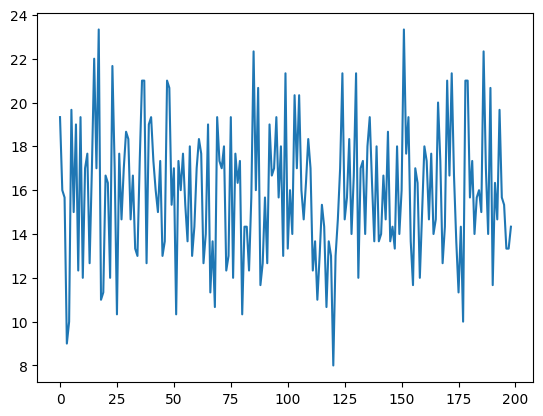

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[19.333333333333332, 16.0, 15.666666666666666, 9.0, 10.0, 19.666666666666668, 15.0, 19.0, 12.333333333333334, 19.333333333333332, 12.0, 17.0, 17.666666666666668, 12.666666666666666, 17.0, 22.0, 17.0, 23.333333333333332, 11.0, 11.333333333333334]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[9.0, 21.0, 20.0, 11.0, 11.0, 17.0, 16.0, 24.0, 25.0, 22.0, 11.0, 12.0, 11.0, 16.0, 15.0, 16.0, 24.0, 16.0, 25.0, 21.0]


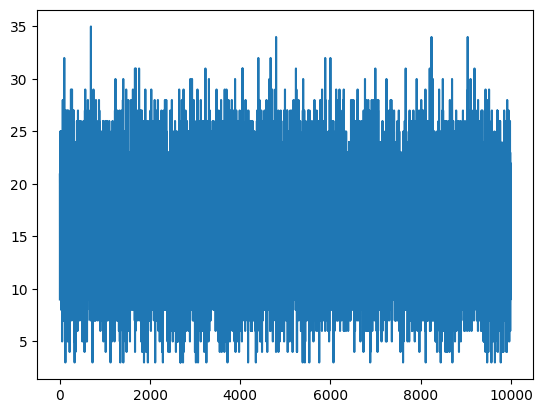

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

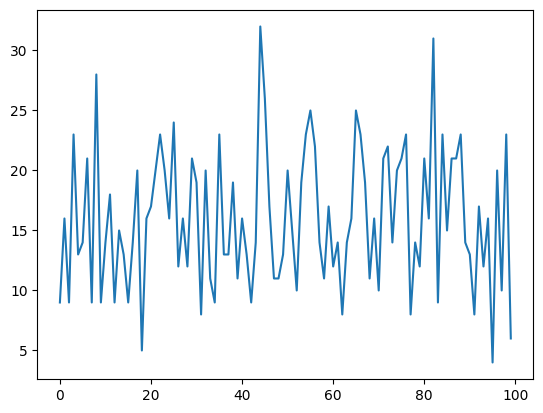

In [10]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

Text(0.5, 0, 'train episodes')

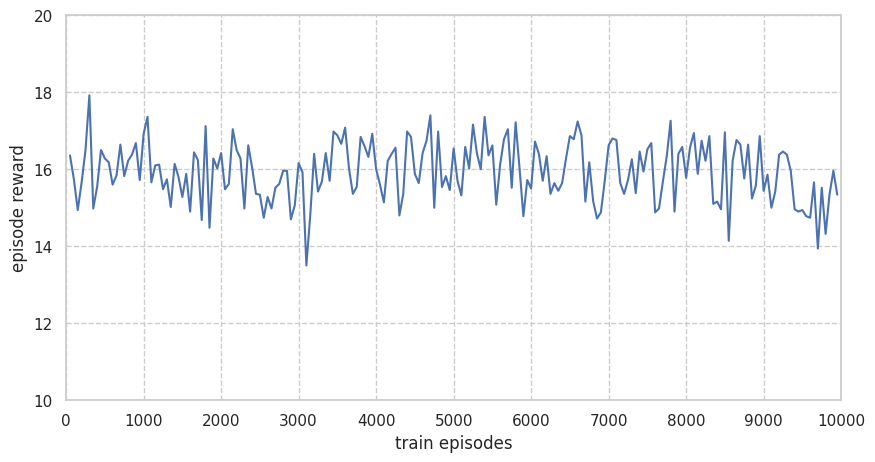

In [35]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})
sns.set_style("whitegrid", {'grid.linestyle': '--'})

#sns.lineplot(score.rolling(25, step=25).mean(), errorbar=('ci', 95), legend=False)
sns.lineplot(score.rolling(50, step=50).mean(), errorbar=('ci', 95), legend=False)


plt.xticks(np.arange(0, 11000, step=1000))
plt.xlim(0,10000)
plt.ylim(10,20)

plt.ylabel("episode reward")
plt.xlabel("train episodes")

#plt.savefig("score_space_invaders_v2.png")
#plt.show()



In [12]:
score[1:101].mean()

0    16.05
dtype: float64